# Random Forest  Tree algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [2]:
# digit dataset is made of 1979 8x8 images. Each image is a hand written digit. 
# In order to utilise 8x8 image, we have to first transform it into a feature vector with length 64.
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

# image in the form of numbers

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

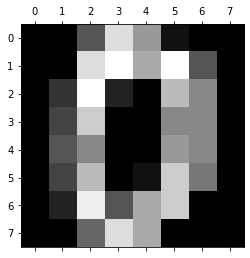

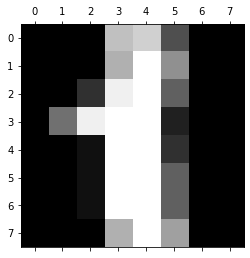

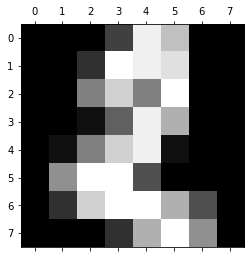

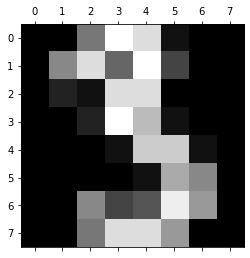

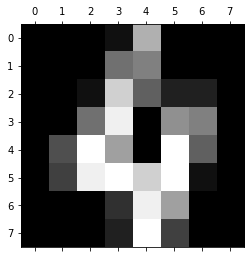

In [5]:
# plot image 
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [6]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [7]:
# create dataframe 
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
X = df.drop(['target'], axis = 'columns')
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
y = df.target
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [11]:
# here data is your independent variable and target is dependent variable 
# use train test split method to split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
len(X_train)

1437

In [13]:
len(X_test)

360

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
model.score(X_test, y_test)

0.9805555555555555

In [28]:
model.predict(X_train)

array([6, 6, 7, ..., 2, 2, 6])

In [29]:
y_predict = model.predict(X_test)

In [30]:
# plt confusion matrix to see where model is not doing well
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

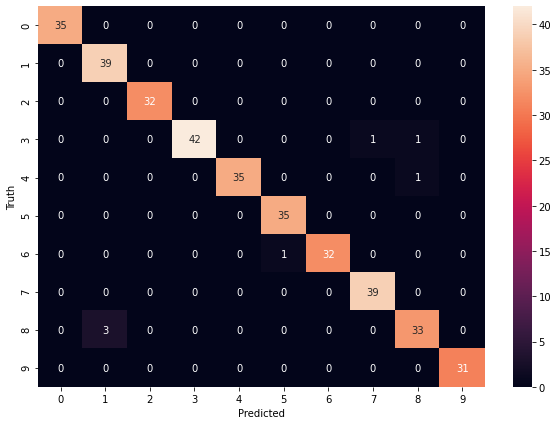

In [31]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Excercise - Iris dataset 
use sklearn datasets iris flower datasets to train your model using logistic regression. you need to figure out accuracy of your model and use different samples in your test datasets. In iris dataset there are 150 samples containing following features
1. Sepal length
2. Sepal width
3. Petal length
4. Petal width

using above 4 features you will classify a flower in one of the three categories
1. Setosa
2. Versicolour
3. Virginica 

In [32]:
from sklearn.datasets import load_iris

In [33]:
flowers = load_iris()

In [34]:
dir(flowers)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [35]:
flowers.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
flowers.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
len(flowers.data)

150

In [38]:
# create a dataframe 
df_iris = pd.DataFrame(flowers.data, columns = flowers.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
# add target name to dataframe
df_iris['target'] = flowers.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
df_iris[df_iris.target ==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
df_iris[df_iris.target ==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [43]:
df_iris[df_iris.target ==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [45]:
# using the lambda function create target names and add to dataframe
df_iris['feature_names'] = df_iris.target.apply(lambda x: flowers.target_names[x])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,feature_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [47]:
# create a separate dataframe for each type of iris flower
df_iris_0 = df_iris[df_iris.target ==0]
df_iris_0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,feature_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [48]:
df_iris_1 = df_iris[df_iris.target ==1]
df_iris_1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,feature_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [49]:
df_iris_2 = df_iris[df_iris.target ==2]
df_iris_2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,feature_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


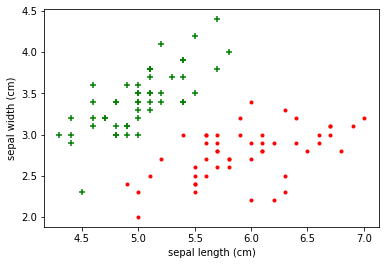

In [50]:
# plot scatter plot to visualise the data

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(df_iris_0['sepal length (cm)'], df_iris_0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df_iris_1['sepal length (cm)'], df_iris_1['sepal width (cm)'], color = 'red', marker = '.')

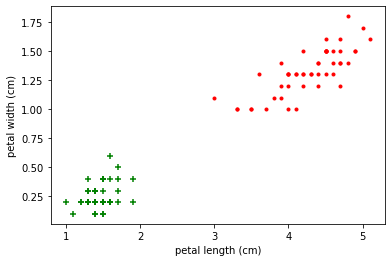

In [51]:
# plot scatter plot to visualise the data

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.scatter(df_iris_0['petal length (cm)'], df_iris_0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df_iris_1['petal length (cm)'], df_iris_1['petal width (cm)'], color = 'red', marker = '.')

In [ ]:
# create input dataset - independent variables - sepal length/width, petal length/width and dependent variable - target

In [53]:
X_iris = df_iris.drop(['target', 'feature_names'], axis = 'columns')
X_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
y_iris = df_iris.target
y_iris.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [56]:
# Independent variable is X and dependent variable is target

from sklearn.model_selection import train_test_split
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size = 0.2)

In [75]:
from sklearn.ensemble import RandomForestClassifier
model_flowers = RandomForestClassifier(n_estimators = 40)

In [76]:
model_flowers.fit(X_iris_train, y_iris_train)

RandomForestClassifier(n_estimators=40)

In [77]:
model_flowers.predict(X_iris_test)

array([2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 2, 1, 2])

In [78]:
model_flowers.score(X_iris_train, y_iris_train)

1.0

In [79]:
model_flowers.score(X_iris_test, y_iris_test)

0.9333333333333333

In [80]:
# Predict the test results

y_iris_pred = model_flowers.predict(X_iris_test)
y_iris_pred



array([2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 2, 1, 2])

In [72]:
# predict probabilities 
prob_y_pred = model_flowers.predict_proba(X_iris_test)
prob_y_pred

array([[0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.55, 0.45],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.95, 0.05],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.75, 0.25],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.9 , 0.1 ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.7 , 0.3 ],
       [0.  , 0.  , 1.  ]])

# print results 

probs_y_pred = np.round(prob_y_pred, 2)

res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, prob_y_pred[:,0], prob_y_pred[:,1], prob_y_pred[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

In [81]:
# prepare confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat_iris = confusion_matrix(y_iris_test, y_iris_pred)
conf_mat_iris

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

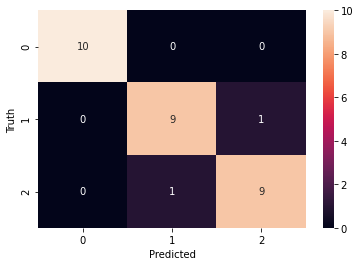

In [82]:
# plot confusion matrix
import pandas as pd
df_cm_iris = conf_mat_iris
sns.heatmap(df_cm_iris, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()